In [6]:
# First, let's load the data to understand its structure and content.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load each file
data_last = pd.read_csv('data/data_last.csv')
data_mkt_cap = pd.read_csv('data/data_mkt_cap.csv')
data_volume = pd.read_csv('data/data_volume.csv')
data_sector = pd.read_csv('data/data_sector.csv')

# Display the first few rows of each dataframe to understand their structure
data_last.head(), data_mkt_cap.head(), data_volume.head()

print(len(data_last), len(data_mkt_cap), len(data_volume), len(data_sector))

tickers = data_last['ticker'].unique()
print(len(tickers))

420537 420537 420537 263
263


In [2]:
# Convert 'date' to datetime
data_last['date'] = pd.to_datetime(data_last['date'])
data_volume['date'] = pd.to_datetime(data_volume['date'])
data_mkt_cap['date'] = pd.to_datetime(data_mkt_cap['date'])

# Sort by 'date'
data_last_sorted = data_last.sort_values(by='date')
data_volume_sorted = data_volume.sort_values(by='date')
data_mkt_cap_sorted = data_mkt_cap.sort_values(by='date')

# Pivot the data
data_pivoted_last = data_last_sorted.pivot(index='date', columns='ticker', values='last')
data_pivoted_volume = data_volume_sorted.pivot(index='date', columns='ticker', values='volume')
data_pivoted_mkt_cap = data_mkt_cap_sorted.pivot(index='date', columns='ticker', values='mkt_cap')

<AxesSubplot:title={'center':'market cap over time'}, xlabel='date'>

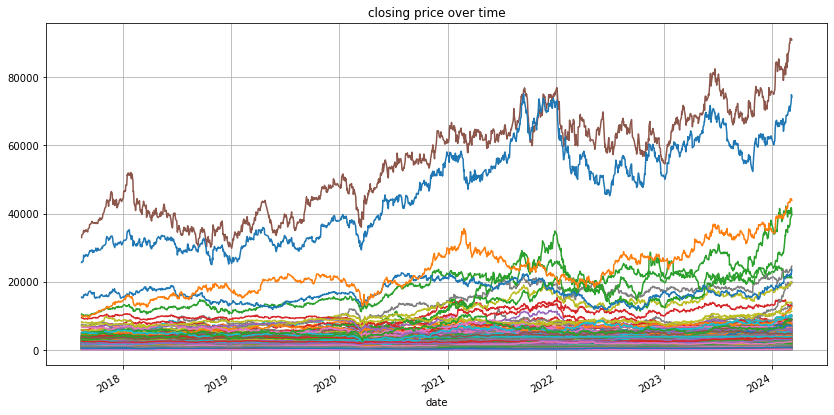

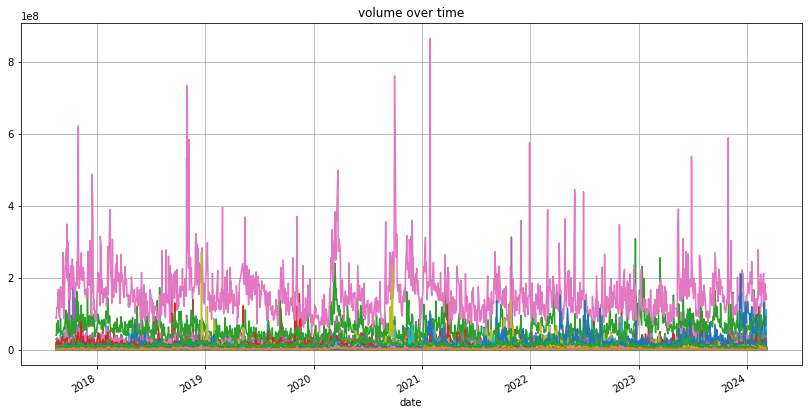

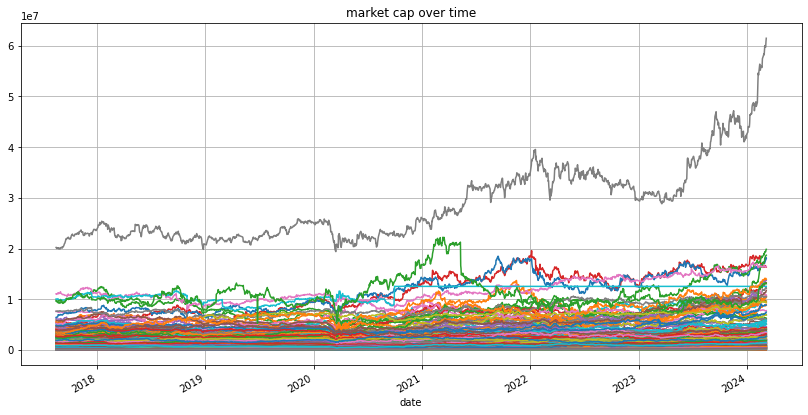

In [20]:
data_pivoted_last.plot(legend=False, grid=True, figsize=(14, 7), title='closing price over time')
data_pivoted_volume.plot(legend=False, grid=True, figsize=(14, 7), title='volume over time')
data_pivoted_mkt_cap.plot(legend=False, grid=True, figsize=(14, 7), title='market cap over time')

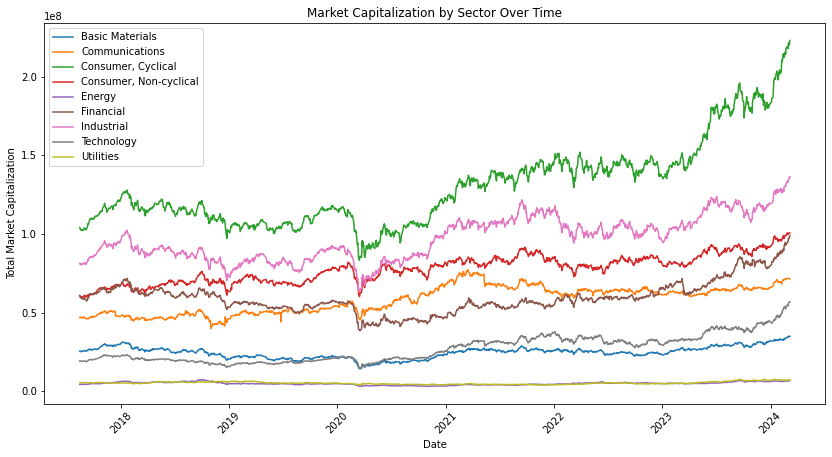

In [21]:
# Merge the market capitalization data with sector information
merged_data_sector = pd.merge(data_mkt_cap, data_sector, on='ticker')

# Convert 'date' to datetime format for better handling
merged_data_sector['date'] = pd.to_datetime(merged_data_sector['date'])

# Aggregate market capitalization by sector and date
sector_mkt_cap = merged_data_sector.groupby(['date', 'bics_sector']).agg({'mkt_cap': 'sum'}).reset_index()

# Pivot the data for easier plotting
sector_mkt_cap_pivot = sector_mkt_cap.pivot(index='date', columns='bics_sector', values='mkt_cap')

# Plotting the aggregated market capitalization by sector over time
plt.figure(figsize=(14, 7))
for column in sector_mkt_cap_pivot.columns:
    plt.plot(sector_mkt_cap_pivot.index, sector_mkt_cap_pivot[column], label=column)

plt.title('Market Capitalization by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Total Market Capitalization')
plt.legend()
plt.xticks(rotation=45)
plt.show()